# Proyek Akhir Machine Learning Expert Dicoding: System Recommendation - Books


- **Nama:** Sarah Adibah
- **Email:** sarahadibah06@gmail.com
- **ID Dicoding:** [addsarah](https://www.dicoding.com/users/addsarah/academies)

**Kriteria Submission:**
- Project merupakan hasil pekerjaan sendiri.
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun.
- Dataset yang dipakai bebas, asal bisa digunakan untuk membuat sistem rekomendasi.
- Memberikan dokumentasi menggunakan text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan proyek.
- Menentukan solusi permasalahan dengan memilih pendekatan berikut:
  - Content-based Filtering
  - Collaborative Filtering
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda mulai dari project overview, business understanding, data understanding, data preparation, modeling, hingga tahap evaluasi.


**Saran Submission**

Menerapkan Rubrik/Kriteria Penilaian (Tambahan) untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.


**Submission yang Tidak Sesuai Kriteria:**
- Tidak melampirkan submission dengan bentuk .zip.
- Tidak melampirkan laporan dengan format markdown (.md) atau text (.txt).
- Tidak melampirkan proyek machine learning (.py atau .ipynb).
- File Jupyter Notebook belum dijalankan.
- Tidak menerapkan seluruh rubrik penilaian wajib (rubrik tidak lengkap).
- File submission tidak bisa di-load oleh tim reviewer.

**Tips**

Anda dapat memilih beberapa topik rekomendasi (namun tidak terbatas pada daftar) berikut:
- Rekomendasi film
- Rekomendasi buku
- Rekomendasi musik
- Rekomendasi video
- Rekomendasi produk
- Rekomendasi artikel
- Rekomendasi berita
- dsb.

**Ketentuan Berkas Submission**

Mengirimkan Submission dalam bentuk .zip yang terdiri dari 3 (tiga) berkas, yaitu:  
- File Jupyter Notebook (.ipynb). Pastikan file Jupyter Notebook sudah dijalankan, ya.
- File Python (.py)
- File laporan dalam bentuk Markdown (.md) atau Text (.txt)


# Dataset
[Books Dataset](https://www.kaggle.com/datasets/saurabhbagchi/books-dataset)

# **1. Library Import**

- *Library* [`os`](https://docs.python.org/3/library/os.html) digunakan untuk menjalankan *function* yang berhubungan dengan *operating system*. `os.environ` berfungsi untuk membaca *username* dan *key* dari [Kaggle](https://kaggle.com).

- *Library* [`numpy`](https://numpy.org) digunakan untuk melakukan pemrosesan matematis seperti operasi himpunan, *array*, matriks multidimensi, dan vektorisasi.

- *Library* [`pandas`](https://pandas.pydata.org) digunakan untuk memproses, menganalisis, dan memanipulasi data dalam format yang terstruktur.

- *Library* [`tensorflow`](https://www.tensorflow.org) digunakan untuk membangun dan melatih model *machine learning* serta *neural networks*.

- *Library* [`sklearn`](https://scikit-learn.org) digunakan dalam pemrosesan *machine learning* dan *data analysis*, seperti klasifikasi, regresi, dan klastering.

- *Library* [`seaborn`](https://seaborn.pydata.org) digunakan untuk membuat visualisasi data yang informatif dan menarik, serta berbasis pada `matplotlib`.

- *Library* [`matplotlib`](https://matplotlib.org) digunakan untuk melakukan visualisasi data menggunakan berbagai jenis *plotting* seperti line chart, bar chart, dan histogram.

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

# **2. Data Loading**

## 2.1 Environment and Kaggle Credential

Menyiapkan *environment* pada `operating system` [Colab](https://colab.research.google.com 'Google Colaboratory') dengan menetapkan variabel `KAGGLE_USERNAME` dan `KAGGLE_KEY` untuk koneksi ke platform [Kaggle](https://kaggle.com 'Kaggle') melalui [Kaggle's Beta API](https://www.kaggle.com/docs/api 'Kaggle Public API Documentation') Token.

In [ ]:
# Username dan key Kaggle API
os.environ['KAGGLE_USERNAME'] = 'addsarah'
os.environ['KAGGLE_KEY']      = 'eff5b83c0a0943cd628b2c66f0878a19'

## 2.2 Dataset Download

Mengambil (*download*) *dataset* dari platform Kaggle dalam bentuk berkas yang masih terkompresi (*compressed file*) dengan nama `book-recommender-system.zip`. Berkas tersebut berasal dari *dataset* [Books Dataset](https://www.kaggle.com/datasets/saurabhbagchi/books-dataset) dan akan digunakan sebagai sumber data utama dalam proyek ini.

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d saurabhbagchi/books-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhbagchi/books-dataset
License(s): CC0-1.0
  0% 0.00/24.6M [00:00<?, ?B/s]
100% 24.6M/24.6M [00:00<00:00, 775MB/s]


Melakukan proses ekstraksi (*extract*) terhadap berkas *dataset* yang masih berada dalam format terkompresi (*compressed*) menggunakan perintah `!unzip`. Setelah diekstrak, akan dihasilkan tiga (3) berkas *dataset* dalam format `.csv` ([comma-separated values](https://docs.python.org/id/3.10/library/csv.html)), yaitu `BX-Books.csv`, `BX-Book-Ratings.csv`, dan `BX-Users.csv`.

In [ ]:
!unzip /content/books-dataset.zip

Archive:  /content/books-dataset.zip
  inflating: books_data/books.csv    
  inflating: books_data/ratings.csv  
  inflating: books_data/users.csv    


# **3. Data Understanding**

## 3.1 Jumlah Data Masing-masing Atribut dari *Dataset*

Melakukan pembacaan masing-masing berkas *dataset*, yaitu `books.csv`, `ratings.csv`, dan `users.csv` ke dalam variabel `df_bo`, `df_ra`, dan `df_us`. Proses ini menggunakan *library* [Pandas](https://pandas.pydata.org 'Python Data Analysis Library') untuk mengonversi berkas berformat CSV menjadi struktur data *dataframe*.

In [ ]:
df_bo = pd.read_csv('books_data/books.csv', encoding='latin-1', on_bad_lines='skip', delimiter=';')
df_ra = pd.read_csv('books_data/ratings.csv', encoding='latin-1', on_bad_lines='skip', delimiter=';')
df_us = pd.read_csv('books_data/users.csv', encoding='latin-1', on_bad_lines='skip', delimiter=';')

<ipython-input-5-305129200547>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bo = pd.read_csv('books_data/books.csv', encoding='latin-1', on_bad_lines='skip', delimiter=';')


Melakukan eksplorasi terhadap jumlah nilai unik dari setiap atribut dalam masing-masing *dataframe* menggunakan fungsi `.unique()`.

In [ ]:
print(f'Jumlah data ISBN     : {len(df_bo["ISBN"].unique())}')
print(f'Jumlah data Judul    : {len(df_bo["Book-Title"].unique())}')
print(f'Jumlah data Penulis  : {len(df_bo["Book-Author"].unique())}')
print(f'Jumlah data Penerbit : {len(df_bo["Publisher"].unique())}')
print(f'Jumlah data Tahun    : {len(df_bo["Year-Of-Publication"].unique())}')
print(f'=====' * 9)
print(f'Jumlah data Pembaca              : {len(df_ra["User-ID"].unique())}')
print(f'Jumlah data Buku                 : {len(df_ra["ISBN"].unique())}')
print(f'Jumlah data Rating yang diterima : {len(df_ra)}')
print(f'=====' * 9)
print(f'Jumlah data User : {len(df_us)}')

Jumlah data ISBN     : 271360
Jumlah data Judul    : 242135
Jumlah data Penulis  : 102023
Jumlah data Penerbit : 16808
Jumlah data Tahun    : 202
Jumlah data Pembaca              : 105283
Jumlah data Buku                 : 340556
Jumlah data Rating yang diterima : 1149780
Jumlah data User : 278858


## 3.2 Univariate Exploratory Data Analysis (EDA)

*Explanatory Data Analysis* (EDA) merupakan tahap awal eksplorasi data untuk memahami karakteristik data, mengidentifikasi pola, *anomaly*, dan memeriksa asumsi melalui pendekatan statistik dan visualisasi grafik.

### 3.2.1 Dataset Books

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Books`.

Menampilkan isi Dataframe `Books`

In [ ]:
df_bo

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Menampilkan ringkasan struktur Dataframe `Books`

In [ ]:
df_bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### 3.2.2 Dataset Rating

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Ratings`.

Menampilkan isi Dataframe `Ratings`

In [ ]:
df_ra

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Menampilkan ringkasan struktur Dataframe `Ratings`

In [ ]:
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Menampilkan ringkasan statistik untuk *dataframe* `Ratings` guna memahami persebaran data, termasuk jumlah (`count`), rata-rata (`mean`), simpangan baku (`std`), nilai minimum (`min`), maksimum (`max`), serta kuartil pertama/Q1 (`25%`), median/Q2 (`50%`), dan kuartil ketiga/Q3 (`75%`).

In [ ]:
df_ra.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Menampilkan deskripsi statistik untuk *dataframe* `Ratings` pada atribut `Book-Rating` guna memperoleh gambaran statistik, seperti nilai rata-rata (`mean`), simpangan baku (`std`), nilai minimum (`min`), maksimum (`max`), serta nilai kuartil pertama/Q1 (`25%`), median/Q2 (`50%`), dan kuartil ketiga/Q3 (`75%`) dari *rating* yang diberikan pengguna terhadap buku yang sudah dibaca

In [ ]:
df_ra['Book-Rating'].describe().apply(lambda x: '%.f' % x)

,Book-Rating
count,1149780
mean,3
std,4
min,0
25%,0
50%,0
75%,7
max,10


Membuat visualisasi berupa histogram untuk melihat distribusi frekuensi *rating* buku, dengan rentang nilai mulai dari 0 hingga 10, yang menunjukkan seberapa sering masing-masing *rating* diberikan.

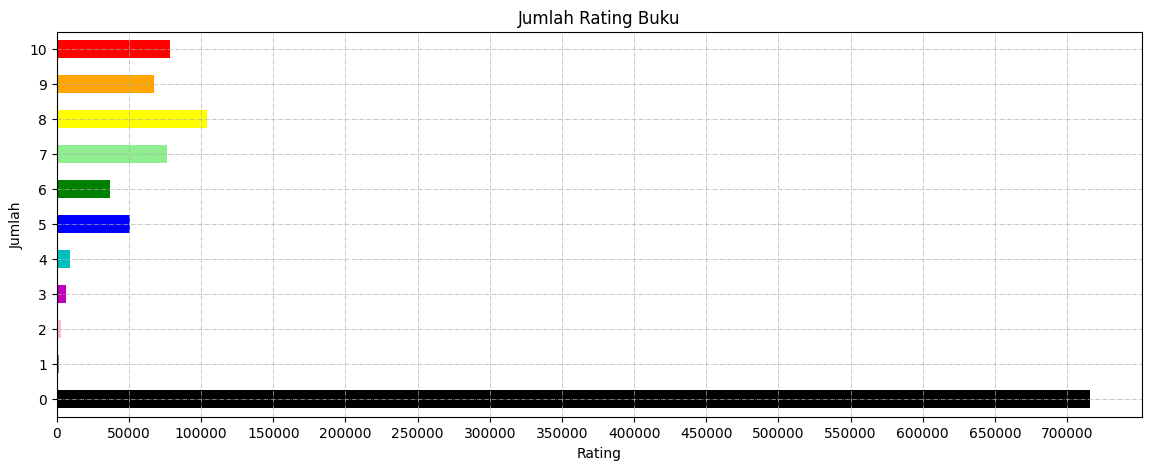

In [ ]:
df_ra['Book-Rating'].value_counts().sort_index().plot(
    kind    = 'barh',
    color   = ['k', 'gray', 'pink', 'm', 'c', 'b', 'g', 'lightgreen', 'yellow', 'orange', 'r'],
    title   = 'Jumlah Rating Buku',
    xlabel  = 'Rating',
    ylabel  = 'Jumlah',
    figsize = (14, 5),
    xticks  = (np.arange(0, 720000, 50000))
).grid(linestyle='-.', linewidth=0.5)

Berdasarkan hasil visualisasi histogram pada bagian "Jumlah Rating Buku", dapat diamati bahwa *rating* 0 merupakan yang paling sering muncul, dengan jumlah melebihi 700.000. Karena nilai ini berpotensi menyebabkan bias dalam analisis, maka *rating* bernilai 0 dapat dihapus pada tahap *data preparation* agar hasil model lebih akurat.

### 3.2.3 Dataset User

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Users`.

Menampilkan isi Dataframe `Users`

In [ ]:
df_us

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Menampilkan ringkasan struktur Dataframe `Users`

In [ ]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Menampilkan ringkasan statistik untuk *dataframe* `Users` guna memahami persebaran data, termasuk jumlah (`count`), rata-rata (`mean`), simpangan baku (`std`), nilai minimum (`min`), maksimum (`max`), serta kuartil pertama/Q1 (`25%`), median/Q2 (`50%`), dan kuartil ketiga/Q3 (`75%`).

In [ ]:
df_us.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


# **4. Data Preparation**

Tahap persiapan data atau *data preparation* adalah proses penting sebelum melakukan pengembangan model *machine learning*.

Pada bagian 4.1 — 4.3 data mentah (*raw data*) dibersihkan dan disiapkan menjadi *clean data* agar lebih siap digunakan dalam proses selanjutnya. Pada proyek sistem rekomendasi ini, proses *preparation* mencakup penyesuaian nama kolom dalam setiap *dataframe*, serta penggabungan data berdasarkan `ISBN` dan `user_id` untuk memperoleh informasi menyeluruh.

## 4.1 Mengubah Nama Kolom/Atribut

Perubahan nama atribut dalam masing-masing *dataframe* menggunakan fungsi `.rename()` bertujuan untuk menyederhanakan proses pemanggilan data pada tahap analisis dan pemodelan berikutnya.

### 4.1.1 Books

Mengganti nama columns pada Dataframe `Books`

In [ ]:
df_bo.rename(columns={
    'ISBN'                : 'isbn',
    'Book-Title'          : 'book_title',
    'Book-Author'         : 'book_author',
    'Year-Of-Publication' : 'year_pub',
    'Publisher'           : 'publisher',
    'Image-URL-S'         : 'image_url_s',
    'Image-URL-M'         : 'image_url_m',
    'Image-URL-L'         : 'image_url_l'
}, inplace=True)

df_bo.head()

,isbn,book_title,book_author,year_pub,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### 4.1.2 Ratings

Mengganti nama columns pada Dataframe `Ratings`

In [ ]:
df_ra.rename(columns={
    'User-ID'     : 'user_id',
    'ISBN'        : 'isbn',
    'Book-Rating' : 'book_rating'
}, inplace=True)

df_ra.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### 4.1.3 Users

Mengganti nama columns pada Dataframe `Users`

In [ ]:
df_us.rename(columns={
    'User-ID'  : 'user_id',
    'Location' : 'location',
    'Age'      : 'age'
}, inplace=True)

df_us.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## 4.2 Menggabungkan Data ISBN

Penggabungan data `Books` berdasarkan ISBN dilakukan dengan menggunakan fungsi `.concatenate` dari *library* [`numpy`](https://numpy.org), untuk mengintegrasikan atribut ISBN dari *dataframe* `df_bo` (buku) dan `df_ra` (rating), sehingga informasi buku dan *rating* dapat dianalisis secara bersamaan.

In [ ]:
ISBNAll = np.concatenate((
    df_bo.isbn.unique(),
    df_ra.isbn.unique()
))

ISBNAll = np.sort(np.unique(ISBNAll))

print(f'Jumlah Buku berdasarkan ISBN : {len(ISBNAll)}')

Jumlah Buku berdasarkan ISBN : 341765


## 4.3 Menggabungkan Data *User*

Proses penggabungan data berdasarkan `user_id` juga dilakukan dengan fungsi `.concatenate` dari *library* [`numpy`](https://numpy.org), dengan menggabungkan informasi pengguna dari *dataframe* `df_us` dan *rating* dari `df_ra`, untuk mengetahui interaksi pengguna terhadap buku.

In [ ]:
UserAll = np.concatenate((
    df_ra.user_id.unique(),
    df_us.user_id.unique()
))

UserAll = np.sort(np.unique(UserAll))

print(f'Jumlah User : {len(UserAll)}')

Jumlah User : 278858


Pada tahap 4.4 — 4.9, data diolah dan ditransformasi agar sesuai dengan kebutuhan proses pemodelan. Dalam proyek ini, tahap tersebut mencakup penanganan data yang hilang (*missing value)*, pengecekan data duplikat, serta penggabungan data dari dataset buku dan *rating*.

## 4.4 Pengecekan Missing Value

Proses identifikasi data yang missing pada sebuah dataframe dapat dilakukan dengan menggunakan metode `.isnull().sum()`. Dengan cara ini, kita dapat mengetahui jumlah total data yang memiliki nilai kosong atau hilang.

### 4.4.1 Books

Memeriksa total data yang memiliki nilai kosong atau hilang pada Dataframe `Books`

In [ ]:
books = df_bo
books.isnull().sum()

,0
isbn,0
book_title,0
book_author,2
year_pub,0
publisher,2
image_url_s,0
image_url_m,0
image_url_l,3


Hasil pemeriksaan deskripsi diatas terhadap *dataframe* `books` menunjukkan bahwa terdapat nilai kosong atau *null* pada beberapa atribut, yaitu `book_author` sebanyak 2 data, `publisher` sebanyak 2 data, dan `image_url_l` sebanyak 3 data.

Nilai-nilai kosong atau *null* tersebut dapat dibersihkan dari dataframe dengan menerapkan fungsi `.dropna()`. Setelah proses ini dilakukan, pengecekan ulang akan menunjukkan bahwa tidak ada lagi nilai kosong di dalam dataframe tersebut.

In [ ]:
books = books.dropna()
books.isnull().sum()

,0
isbn,0
book_title,0
book_author,0
year_pub,0
publisher,0
image_url_s,0
image_url_m,0
image_url_l,0


### 4.4.2 Ratings

Memeriksa total data yang memiliki nilai kosong atau hilang pada Dataframe `Ratings`

In [ ]:
ratings = df_ra
ratings.isnull().sum()

,0
user_id,0
isbn,0
book_rating,0


Sementara itu, berdaasarkan deskripsi diatas terhadap *dataframe* `ratings` memperlihatkan bahwa semua kolom tidak memiliki nilai kosong atau *null*.

Namun, pada tahap *Univariate Exploratory Data Analysis* (EDA) sebelumnya, terlihat dari histogram "Jumlah Rating Buku" bahwa sebagian besar *rating* berada di nilai 0, yang mencapai lebih dari 700.000 data. Nilai *rating* 0 ini berpotensi menimbulkan bias dalam analisis, sehingga perlu dihapus dari *dataframe*.


Menghitung Total `Ratings` 0

In [ ]:
print(f'Total Rating 0 : {ratings.book_rating.eq(0).sum()}')

ratings = ratings[df_ra.book_rating > 0]

Total Rating 0 : 716109


Setelah dihitung, jumlah data dengan *rating* 0 mencapai 716.109 baris. Oleh karena itu, hanya *rating* di atas 0 yang akan disertakan dalam analisis, yaitu rating dari 1 hingga 10.

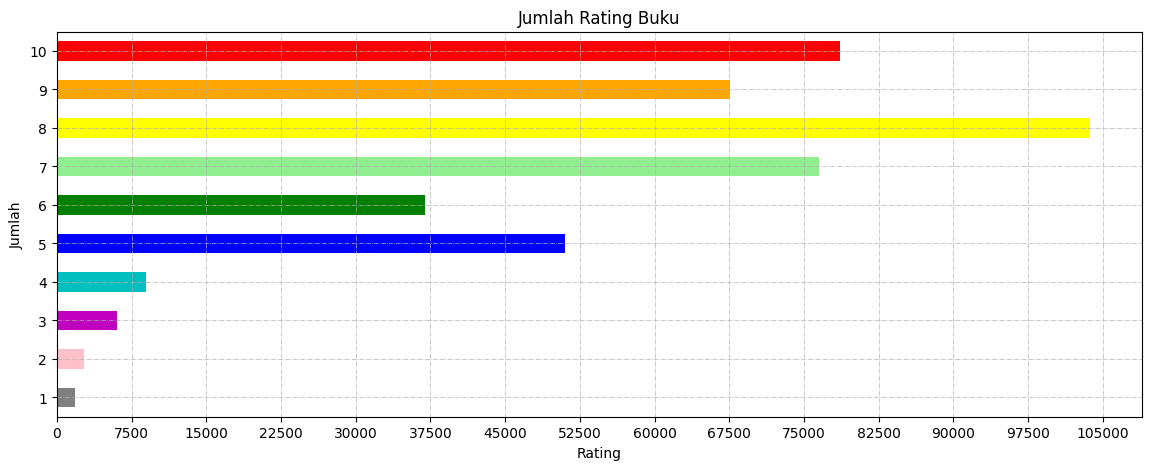

In [ ]:
ratings.book_rating.value_counts().sort_index().plot(
    kind    = 'barh',
    color   = ['gray', 'pink', 'm', 'c', 'b', 'g', 'lightgreen', 'yellow', 'orange', 'r'],
    title   = 'Jumlah Rating Buku',
    xlabel  = 'Rating',
    ylabel  = 'Jumlah',
    figsize = (14, 5),
    xticks  = (np.arange(0, 110000, 7500))
).grid(linestyle='-.', linewidth=0.5)

Berdasarkan hasil visualisasi grafik histogram di atas, distribusi data dalam histogram menjadi lebih teratur, terutama pada rentang *rating* 1 hingga 4.

### 4.4.3 Users

Memeriksa total data yang memiliki nilai kosong atau hilang pada Dataframe `Users`

In [ ]:
users = df_us
users.isnull().sum()

,0
user_id,0
location,0
age,110762


Berdasarkan deskripsi di atas, dapat dilihat bahwa pada *dataframe* `users` terdapat atribut yang memiliki nilai kosong atau *null*, yaitu pada atribut `age` sebanyak 110.762 data.

Menampilkan isi Dataframe `Users`

In [ ]:
df_us

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Berdasarkan tabel *dataframe* `Users` di atas, dapat dilihat bahwa terdapat nilai `null` atau `NaN` (*Not a Number*) pada kolom/atribut `Age`. Sehingga perlu dilakukan pemrosesan lebih lanjut dengan  mengganti nilai kosong atau string tidak valid seperti `'NaN'`, `'nan'`, `' '`, dan `'`' menjadi nilai `np.nan`. Setelah itu, kolom `Age` dikonversi ke dalam tipe numerik agar dapat dianalisis lebih lanjut, dan baris-baris yang mengandung nilai NaN dihapus menggunakan `dropna()` untuk memastikan kualitas dan konsistensi data.

In [ ]:
df_us.replace(['NaN', 'nan', ' ', ''], np.nan, inplace=True)
df_us['age'] = pd.to_numeric(df_us['age'])
df_us.dropna(inplace=True)

Menampilkan isi Dataframe `Users` guna memeriksa apakah nilai `null` atau `NaN` (*Not a Number*) pada kolom/atribut `Age` sudah terhapus atau belum

In [ ]:
df_us

,user_id,location,age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


Berdasarkan tabel *dataframe* `Users` di atas, dapat dilihat bahwa terdapat nilai `null` atau `NaN` (*Not a Number*) pada kolom/atribut `Age` sudah dihapus.

Memeriksa kembali total data yang memiliki nilai kosong atau hilang pada Dataframe `Users`

In [ ]:
users = df_us
users.isnull().sum()

,0
user_id,0
location,0
age,0


Pemeriksaan terhadap *dataframe* `users` diatas menunjukkan bahwa tidak ada nilai kosong atau *null* yang ditemukan di seluruh kolomnya.

Menampilkan histogram dari kolom age pada Dataframe `users`

<Axes: >

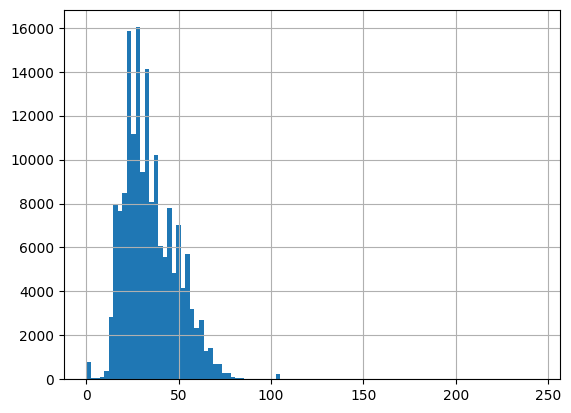

In [ ]:
users.age.hist(bins=100)

Berdasarkan hasil visualisasi grafik histogram umur *user* di atas, dapat dilihat bahwa mayoritas pengguna berada pada rentang usia 20—40 tahun, dengan puncak distribusi antara 30—35 tahun.

Terdapat pula sebagian kecil pengguna dengan usia di bawah 10 tahun dan di atas 80 tahun, namun jumlahnya jauh lebih sedikit dibandingkan kelompok usia produktif. Hal ini menunjukkan bahwa sistem rekomendasi buku kemungkinan besar akan lebih relevan jika disesuaikan dengan preferensi kelompok usia 20—40 tahun.

## 4.5 Pengecekan Data Duplikat

Untuk mendeteksi apakah terdapat data duplikat di dalam *dataframe*, dapat menggunakan fungsi `.duplicated().sum()`.

In [ ]:
print(f'Jumlah data books  yang duplikat: {books.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')
print(f'Jumlah data users  yang duplikat: {users.duplicated().sum()}')

Jumlah data books  yang duplikat: 0
Jumlah data rating yang duplikat: 0
Jumlah data users  yang duplikat: 0


Hasilnya, tidak ditemukan adanya data duplikat pada *dataframe* `books`, `ratings`, maupun `users`.

## 4.6 Menggabungkan Data Buku dan Rating

Menggabungkan dua Datadrame yaitu `ratings` dan `books` berdasarkan kolom yang sama, yaitu `'isbn'`

In [ ]:
books_ratings = pd.merge(ratings, books, on=['isbn'])
books_ratings

,user_id,isbn,book_rating,book_title,book_author,year_pub,publisher,image_url_s,image_url_m,image_url_l
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
...,...,...,...,...,...,...,...,...,...,...
383832,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
383833,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...
383834,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
383835,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


## 4.7 TF-IDF Vectorizer

*Term Frequency Inverse Document Frequency Vectorizer* ([TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 'TfidfVectorizer - scikit-learn Documentation')) *Algorithm* digunakan untuk mengubah teks mentah menjadi representasi numerik yang memiliki makna tertentu dalam bentuk matriks, yang dapat diproses dan digunakan oleh model *machine learning*.

Mengubah data teks pada kolom `book_author` menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(books.book_author)
# tfidf.get_feature_names_out()

TfidfVectorizer()

Transformasi data pada atribut `book_author` ke dalam matriks dilakukan menggunakan fungsi `.fit_transform()`.

In [ ]:
tfidf_matrix = tfidf.fit_transform(books.book_author)
tfidf_matrix.shape

(10000, 5575)

Hasil dari transformasi ini adalah matriks dengan ukuran 10.000 baris buku dan 5.575 kolom yang mewakili *author*.

Karena hasil dari vectorizer masih berupa vektor *(vectorizer)*, maka perlu dikonversi ke bentuk matriks dengan fungsi `.todense()`.

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Untuk menampilkan hasil transformasi TF-IDF ke dalam format yang lebih mudah dibaca, matriks tersebut dikonversi menjadi *dataframe* dengan kolom berupa nama *author* dan baris *(index)* adalah judul buku.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tfidf.get_feature_names_out(),
    index   = books.book_title
).sample(20, axis=1).sample(10, axis=0)

,saavedra,louvish,gitlin,flank,reinhard,medina,volkart,hausman,hood,kincaid,morrell,whittaker,peretti,malerba,tropper,md,nicola,riccardo,fan,whittemore
book_title,,,,,,,,,,,,,,,,,,,,
The Night of Four Hundred Rabbits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Who Needs Decaf? (Harlequin Flipside, No. 6)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BEAUTIFUL AND DAMNED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Seville Communion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Richtig leben mit Geri Weibel. Neue Folge.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bodyguard /Husband : Ultimate Agents (Harlequin Intrigue Series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Working Class Zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deadlock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
An Irresistible Impulse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4.8 Encoding

Melakukan penyandian (*encoding*) fitur `user_id` ke dalam indeks integer.

In [ ]:
user_ids = ratings.user_id.unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Menampilkan hasil mapping antara `user IDs` dengan ID yang sudah di-encode

In [ ]:
print(user_ids)
print(user_to_user_encoded)
print(user_encoded_to_user)

[276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276804, 276808, 276811, 276812, 276813, 276814, 276820, 276822, 276827, 276828, 276830, 276832, 276835, 276837, 276842, 276847, 276848, 276850, 276853, 276854, 276857, 276859, 276861, 276862, 276863, 276866, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276949, 276953, 276954, 276957, 276959, 276964, 276965, 276984, 276986, 276988, 276990, 276992, 276994, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277023, 277028, 277031, 277032, 277036, 277042, 277048, 277051, 277052, 277053, 277056, 277058, 277065, 277072, 277074, 277079, 277085, 277087, 277090, 277094, 277096, 277107, 277109, 277116, 277124, 277128, 277129, 277134, 277135, 277139, 277143, 277157, 277159, 277165,

Langkah pertama adalah melakukan *encoding* terhadap fitur `isbn` ke dalam indeks integer.

In [ ]:
book_ids = ratings.isbn.unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

Menampilkan hasil mapping antara `Boook IDs` dengan ID yang sudah di-encode

In [ ]:
print(book_ids)
print(book_to_book_encoded)
print(book_encoded_to_book)

['0155061224', '052165615X', '0521795028', '3257224281', '0600570967', '038550120X', '342310538', '0060517794', '0671537458', '0679776818', '0943066433', '1885408226', '0747558167', '3596218098', '0684867621', '0451166892', '8440682697', '0380711524', '3453092007', '3453213025', 'N3453124715', '9057868059', '0553572369', '3499230933', '3596151465', '3442136644', '8484330478', '8484332039', '2864322102', '8437606322', '8466300821', '8478442588', '0345443683', '043935806X', '055310666X', '0330332775', '0006379702', '3442131340', '3548603203', '1562827898', '0440498058', '0395547032', '0440414121', '8879839993', '8423996565', '8426449476', '8426449573', '8478884831', '8478885218', '8478885463', '8478886044', '0091830893', '0586207414', '0812571029', '0140260498', '0060096195', '0141310340', '0142302198', '0156006065', '0375821813', '038076041X', '0439401399', '0552546933', '0689804458', '0699854289', '0786812508', '0786817070', '0805057706', '1551925060', '1573248533', '000651118X', '2253

`user_id` dan `isbn` kemudian dipetakan ke dataframe masing-masing.



In [ ]:
ratings['user'] = ratings.user_id.map(user_to_user_encoded)
ratings['book'] = ratings.isbn.map(book_to_book_encoded)

Pemeriksaan selanjutnya dilakukan terhadap jumlah *user*, jumlah buku, serta nilai *rating* minimum dan maksimum.

In [ ]:
num_users = len(user_encoded_to_user)
num_books = len(book_encoded_to_book)
print(num_users)
print(num_books)

min_ratings = min(ratings.book_rating)
max_ratings = max(ratings.book_rating)
print(f'Number of User: {num_users}, Number of Books: {num_books}, Min Rating: {min_ratings}, Max Rating: {max_ratings}')

1204
4565
Number of User: 1204, Number of Books: 4565, Min Rating: 1, Max Rating: 10


## 4.9 Training Data and Validation Data Split

Melakukan pengecekan terhadap *dataframe* `ratings` setelah atribut tambahan `user` dan `book` ditambahkan ke dalam dataframe ratings, data kemudian diacak menggunakan fungsi [`.sample(frac=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html 'pandas.DataFrame.sample - Pandas Documentation').

In [ ]:
ratings = ratings.sample(frac=1, random_state=412)
ratings

,user_id,isbn,book_rating,user,book
1554,277427,0375408886,9,200,681
1465,277427,0060542128,7,200,666
9656,81,0375410538,5,649,2307
4153,278257,0060194596,9,462,1728
4324,278411,0446608831,8,500,1825
...,...,...,...,...,...
820,277051,0385720920,10,98,380
629,276939,2253063339,9,70,269
12371,1167,038533656X,5,941,3478
2120,277478,0451459393,8,215,855


Dataset kemudian dibagi menjadi data latih dan data uji dengan rasio 80:20, di mana 80% digunakan untuk pelatihan model (*training data*) dan 20% untuk validasi (*validation data*).

In [ ]:
x = ratings[['user', 'book']].values
y = ratings['book_rating'].apply(lambda x: (x-min_ratings) / (max_ratings-min_ratings)).values

train_indices = int(0.8 * ratings.shape[0])

xTrain, xVal, yTrain, yVal = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 200  681]
 [ 200  666]
 [ 649 2307]
 ...
 [ 941 3478]
 [ 215  855]
 [1012 3676]] [0.88888889 0.66666667 0.44444444 ... 0.44444444 0.77777778 0.77777778]


Berdasarkan proses *data understanding* atau pemahaman data sebelumnya, diketahui bahwa jumlah data yang tersedia cukup besar, dengan ratusan ribu hingga jutaan data. Volume data ini berpengaruh terhadap waktu komputasi dan sumber daya yang dibutuhkan untuk proses *modeling*. Oleh karena itu, pada proyek ini, jumlah data akan dibatasi menjadi 10.000 data `books` dan 5.000 data `ratings` untuk proses pemodelan.

In [ ]:
books   = books[:10000]
ratings = ratings[:5000]

# **5. Modeling**

Tahap selanjutnya dalam proyek ini adalah proses *modeling* atau membangun model *machine learning* yang berfungsi sebagai sistem rekomendasi. Model ini akan menggunakan berbagai algoritma rekomendasi tertentu untuk memberikan rekomendasi buku terbaik kepada pengguna.



## 5.1 Content-based Recommendation

Sistem rekomendasi berbasis konten *(Content-based Recommendation)* digunakan untuk merekomendasikan item yang serupa dengan yang disukai pengguna sebelumnya. Metode *content-based filtering* mempelajari preferensi pengguna berdasarkan informasi dari item yang pernah mereka nilai.


### 5.1.1 Cosine Similarity

Pengukuran kesamaan antar judul buku dilakukan dengan menggunakan teknik [`cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html 'cosine_similarity - scikit-learn Documentation'), melalui fungsi `cosine_similarity` dari library `sklearn`.


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Array hasil *cosine similarity* tersebut kemudian dikonversi menjadi *dataframe*.


In [ ]:
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    columns = books.book_title,
    index   = books.book_title
)

print(f'Cosine Similarity Shape : {cosine_sim_df.shape}')

cosine_sim_df.sample(8, axis=1).sample(8, axis=0)

Cosine Similarity Shape : (10000, 10000)


book_title,Whisper to Me of Love,En LA Boca Del Dragon,Standing Out (72),Angel of Darkness (Key Books),Rebekah (Women of Genesis),There's No Toilet Paper on the Road Less Traveled: The Best of Travel Humor and Misadventure (Travelers' Tales Guides),Wolf Moon,The Country Under My Skin: A Memoir of Love and War
book_title,,,,,,,,
The Pursuit (Avon Historical Romance),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hawaii's Best Spooky Tales: True Local Spine-Tinglers (Hawaiis Best Spooky Tales),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The STAR GROUP PAPERBACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Too Close to the Falls: A Memoir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Die Entdeckung der Langsamkeit.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crescent City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The 1998 What Color Is Your Parachute : A Practical Manual for Job-Hunters and Career Changers (Paper),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rush Limbaugh Is a Big Fat Idiot: And Other Observations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.1.2 Recommendation Testing

Fungsi `author_recommendations` dibuat untuk menampilkan daftar buku yang direkomendasikan, berdasarkan input berupa nama penulis dari buku yang telah dibaca oleh *user*.

In [ ]:
def author_recommendations(book_title, similarity_data=cosine_sim_df, items=books[['book_title', 'book_author']], k=10):
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Menyimpan judul buku yang sudah dibaca

In [ ]:
readed_book_title = 'The Pillars of the Earth'

Mencari dan menampilkan data buku yang judulnya sama dengan nilai pada `readed_book_title`

In [ ]:
books[books.book_title.eq(readed_book_title)]

,isbn,book_title,book_author,year_pub,publisher,image_url_s,image_url_m,image_url_l
102,0451166892,The Pillars of the Earth,Ken Follett,1996,Signet Book,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...


Menampilkan rekomendasi buku berdasarkan buku yang telah dibaca `(readed_book_title)`, namun terkadang sistem memberikan rekomendasi yang sama lebih dari sekali, sehingga perlu menghilangkan judul buku yang duplikat dari hasil rekomendasi dengan `drop_duplicates()`.

In [ ]:
author_recommendations(readed_book_title).drop_duplicates()

,book_title,book_author
0,Jackdaws,Ken Follett
1,Doble Juego,Ken Follett
3,Code to Zero,Ken Follett
4,Nacht Ã?Â¼ber den Wassern.,Ken Follett
5,Los Pilares de la Tierra,Ken Follett
6,The Hammer of Eden: A Novel,Ken Follett
7,Paper Money,Ken Follett
8,Die SÃ?Â¤ulen der Erde. Roman.,Ken Follett
9,Night over Water,Ken Follett


Hasil dari sistem menunjukkan bahwa berdasarkan masukan nama buku "The Pillars of the Earth", sistem berhasil menghasilkan beberapa rekomendasi buku yang sesuai berdasarkan input atau masukan sebuah nama buku yaitu "The Pillars of the Earth" yang menghasilkan beberapa nama buku yang relevan berdasarkan perhitungan sistem.

## 5.2 Collaborative Filtering Recommendation

Sistem rekomendasi penyaringan kolaboratif (*Collaborative Filtering Recommendation*) bertujuan untuk merekomendasikan item yang disukai pengguna lain yang memiliki preferensi serupa. Pendekatan ini didasarkan pada rating yang diberikan oleh pengguna sebelumnya.



### 5.2.1 Model Development and Training

Model rekomendasi dikembangkan dengan memanfaatkan kelas `RecommenderNet` dengan [*keras model class*](https://keras.io/api/models/model 'Model class - Keras Documentation').


In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias      = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0])
        user_bias   = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias   = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)

        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

Dalam proses *model compiling*, digunakan [Adam optimizer](https://keras.io/api/optimizers/adam 'Adam - Keras Documentation'), [binary crossentropy loss function](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class 'BinaryCrossentropy - Keras Documentaion'), dan metrik [RMSE](https://keras.io/api/metrics/regression_metrics/#rootmeansquarederror-class 'RootMeanSquaredError - Keras Documentation') (Root Mean Squared Error).



In [ ]:
model = RecommenderNet(num_users, num_books, 50)

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss      = BinaryCrossentropy(),
    metrics   = [RootMeanSquaredError()]
)

Model kemudian dilatih *(training)* menggunakan fungsi `.fit()` dengan parameter `batch_size`=20 dan `epochs`=30.


In [ ]:
history = model.fit(
    x               = xTrain,
    y               = yTrain,
    batch_size      = 20,
    epochs          = 30,
    validation_data = (xVal, yVal),
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.6899 - root_mean_squared_error: 0.3107 - val_loss: 0.6811 - val_root_mean_squared_error: 0.2953
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6111 - root_mean_squared_error: 0.2388 - val_loss: 0.6749 - val_root_mean_squared_error: 0.2899
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5735 - root_mean_squared_error: 0.1991 - val_loss: 0.6740 - val_root_mean_squared_error: 0.2892
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5658 - root_mean_squared_error: 0.1930 - val_loss: 0.6722 - val_root_mean_squared_error: 0.2876
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5643 - root_mean_squared_error: 0.1953 - val_loss: 0.6713 - val_root_mean_squared_error: 0.2868
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5585 - root_mean_squared_error: 0.1874 - val_loss: 0.6701 - val_root_mean_squared_error: 0.2858
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### 5.2.2 Recommendation Testing

*Dataset books* dan *ratings* didefinisikan ulang.

In [ ]:
datasetBook   = books
datasetRating = ratings

Untuk menghasilkan rekomendasi, diperlukan sebuah data atau sampel dari pengguna secara acak dan mendefinisikan variabel buku yang belum pernah dibaca oleh pengguna (`notReadedBooks`)ditentukan menggunakan operator logika bitwise ([`~`](https://docs.python.org/3/reference/expressions.html#unary-arithmetic-and-bitwise-operations 'Unary Arithmetic and Bitwise Operations - Python Documentation')) terhadap buku yang sudah dibaca oleh *user* (`readedBooks`).

In [ ]:
userId      = datasetRating.user_id.sample(1).iloc[0]
readedBooks = datasetRating[datasetRating.user_id == userId]

notReadedBooks = datasetBook[~datasetBook['isbn'].isin(readedBooks.isbn.values)]['isbn']
notReadedBooks = list(
    set(notReadedBooks).intersection(set(book_to_book_encoded.keys()))
)

notReadedBooks = [[book_to_book_encoded.get(x)] for x in notReadedBooks]
userEncoder    = user_to_user_encoded.get(userId)
userBookArray = np.hstack(
    ([[userEncoder]] * len(notReadedBooks), notReadedBooks)
)

Prediksi terhadap daftar buku yang akan direkomendasikan dilakukan dengan menggunakan fungsi [`.predict()`](https://keras.io/api/models/model 'Model class - Keras Documentation') dari *library* Keras.

In [ ]:
ratings = model.predict(userBookArray).flatten()

topRatingsIndices   = ratings.argsort()[-10:][::-1]
recommendedBookIds = [
    book_encoded_to_book.get(notReadedBooks[x][0]) for x in topRatingsIndices
]

print('Showing recommendations for users: {}'.format(userId))
print('=====' * 8)
print('Book with high ratings from user')
print('-----' * 8)

topBookUser = (
    readedBooks.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .isbn.values
)

bookDfRows = datasetBook[datasetBook['isbn'].isin(topBookUser)]
for row in bookDfRows.itertuples():
    print(row.book_title, 'oleh', row.book_author)

print('=====' * 8)
print('Top 10 Books Recommendation')
print('-----' * 8)

recommended_books = datasetBook[datasetBook['isbn'].isin(recommendedBookIds)]
for row in recommended_books.itertuples():
    print(row.book_title, 'oleh', row.book_author)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Showing recommendations for users: 1248
Book with high ratings from user
----------------------------------------
House Harkonnen (Dune: House Trilogy, Book 2) oleh Brian Herbert
House Atreides (Dune: House Trilogy, Book 1) oleh Brian Herbert
Me and My Little Brain oleh JOHN FITZGERALD
And the Sea Will Tell oleh Vincent Bugliosi
The Sparrow oleh MARY DORIA RUSSELL
Top 10 Books Recommendation
----------------------------------------
To Kill a Mockingbird oleh Harper Lee
Seabiscuit: An American Legend oleh LAURA HILLENBRAND
The Secret Life of Bees oleh Sue Monk Kidd
The Bean Trees oleh Barbara Kingsolver
The Red Tent (Bestselling Backlist) oleh Anita Diamant
Life of Pi oleh Yann Martel
The Phantom Tollbooth oleh Norton Juster
The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002) oleh John Steinbeck
A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail) oleh Bill Bryson
The Message 

Berdasarkan hasil prediksi sistem, pengguna dengan `user_id` **1248** dipilih secara acak. Dari data yang diperoleh, sistem mengidentifikasi buku-buku dengan rating tertinggi yang diberikan oleh pengguna tersebut, yaitu:

- **House Harkonnen (Dune: House Trilogy, Book 2)** oleh **Brian Herbert**
- **House Atreides (Dune: House Trilogy, Book 1)** oleh **Brian Herbert**
- **Me and My Little Brain** oleh **John Fitzgerald**
- **And the Sea Will Tell** oleh **Vincent Bugliosi**
- **The Sparrow** oleh **Mary Doria Russell**

Langkah selanjutnya, sistem mencocokkan buku-buku favorit dari `user_id` **1248** dengan koleksi buku yang belum pernah dibaca oleh pengguna tersebut. Proses ini menghasilkan daftar rekomendasi berdasarkan skor prediksi tertinggi terhadap preferensi pengguna.

Jika diperhatikan, terdapat kemiripan antara buku favorit pengguna dan hasil rekomendasi, misalnya, **The Sparrow** memiliki kesamaan dengan **Life of Pi**.

Sistem rekomendasi ini menunjukkan kemampuannya dalam memahami pola preferensi pengguna dan menyarankan buku-buku yang tidak hanya serupa dalam tema, tetapi juga memperluas preferensi pengguna terhadap genre dan penulis baru. Hal ini menjadikan pengalaman membaca lebih beragam.


# **6. Evaluation**

Tahap berikutnya dalam proyek ini adalah menentukan metrik evaluasi yang digunakan untuk mengukur kinerja model rekomendasi yang telah dibangun. Pemilihan metrik evaluasi disesuaikan dengan konteks data, permasalahan yang dihadapi, serta solusi yang diharapkan dari sistem rekomendasi ini.


## 6.1 Content-based Evaluation

Metrik evaluasi yang digunakan dalam proyek ini adalah Precision. Precision mengukur seberapa tepat rekomendasi yang diberikan oleh model, yaitu proporsi rekomendasi yang relevan dari seluruh rekomendasi yang dihasilkan.

Mengukur precision@k, eberapa tepat rekomendasi buku yang diberikan berdasarkan buku tertentu dengan membandingkan berapa banyak buku yang direkomendasikan dari penulis yang sama dalam 10 rekomendasi teratas.

In [ ]:
def precision_at_k(book_title, k=10):
    if book_title not in books['book_title'].values:
        print(f"Judul buku '{book_title}' tidak ditemukan di dataset.")
        return 0.0, 0, 0, set()

    author_name = books[books.book_title == book_title]['book_author'].values[0]
    relevant_books = set(books[books.book_author == author_name]['book_title'].values)

    recommended = author_recommendations(book_title).drop_duplicates()
    recommended = recommended.head(k)  # Safe even if len < k
    recommended_titles = set(recommended['book_title'].values)

    actual_k = len(recommended_titles)
    relevant_in_k = len(recommended_titles & relevant_books)

    precision = (relevant_in_k / actual_k) * 100 if actual_k > 0 else 0

    return precision, relevant_in_k, len(relevant_books), recommended_titles

Menguji seberapa akurat sistem rekomendasi dengan menghitung precision@10 pada buku berjudul The Pillars of the Earth, lalu menampilkan persentase ketepatan rekomendasi dan jumlah rekomendasi yang relevan berdasarkan penulis yang sama.

In [ ]:
readed_book_title = 'The Pillars of the Earth'  # Judul buku yang sama dengan recommendation testing
precision, relevan_ditemukan, relevant_books, buku_rekomendasi = precision_at_k(readed_book_title, k=10)

print(f'Precision@10 untuk buku "{readed_book_title}": {precision:.2f}%')
print(f'{relevan_ditemukan} dari {len(buku_rekomendasi)} rekomendasi cocok dengan {relevant_books} buku oleh author yang sama.')

Precision@10 untuk buku "The Pillars of the Earth": 100.00%
9 dari 9 rekomendasi cocok dengan 19 buku oleh author yang sama.


## 6.2 Collaborative Filtering Evaluation

Visualisasi performa *training* dan *validation* *error* serta *training* dan *validation* *loss* ditampilkan melalui grafik menggunakan *library* [`matplotlib`](https://matplotlib.org 'Matplotlib - Visualization with Python').



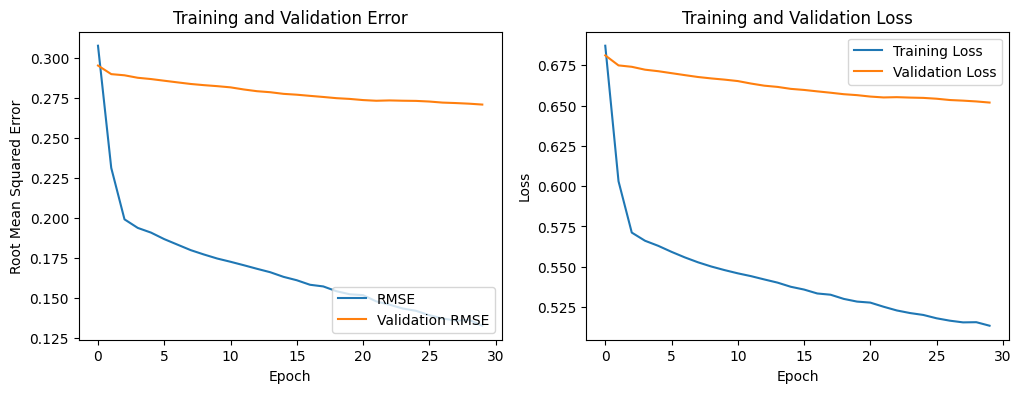

In [ ]:
rmse     = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(rmse,     label='RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Training and Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss,     label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# **7. Kesimpulan**

Kesimpulan dari pengembangan model yang digunakan untuk membuat rekomendasi buku ini menunjukkan bahwa kedua pendekatan, yaitu *Content-based Recommendation* dan *Collaborative Filtering Recommendation*, berhasil diterapkan sesuai dengan preferensi pengguna. Pada metode *collaborative filtering*, data *rating* pengguna sangat diperlukan untuk menghasilkan rekomendasi, sedangkan pada *content-based filtering*, sistem hanya mengandalkan atribut dari buku tanpa membutuhkan data *rating*. Masing-masing pendekatan tersebut memiliki keunggulan dan keterbatasan tersendiri dalam penggunaannya.